In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
plik_rsel = pd.read_csv('rsel.csv')
plik_cel = pd.read_csv('cel.csv')
plik_cel_rs = pd.read_csv('cel-rs.csv')
plik_2cel = pd.read_csv('2cel.csv')
plik_2cel_rs = pd.read_csv('2cel-rs.csv')

files = [ plik_rsel, plik_cel, plik_cel_rs, plik_2cel, plik_2cel_rs ]
labels = [ "1-Evol-RS", "1-Coev", "1-Coev-RS", "2-Coev", "2-Coev-RS"]

In [137]:
def count_avg(source):
    source_transp = source.transpose()
    return np.mean(source_transp[2:], axis=0)

In [138]:
def draw_plot(source, label):
    plt.plot(source['effort']/1000, count_avg(source)*100, label=label)
    plt.legend()

In [139]:
def draw_plot2():
    tab = []
    tab2 = [[],[],[],[],[]]
    for file in files:
        source_transp = file.transpose()
        tab.append(np.mean(source_transp[2:], axis=0))
    for j, files_cell in enumerate(tab):
        for i, each_value in enumerate(files_cell):
            tab2[j].append([each_value]*(i+1))
        tab2[j] = np.concatenate(tab2[j])
    meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='firebrick')
    plt.boxplot(tab2, sym=' ', showmeans=True, meanprops=meanpointprops, labels=labels);

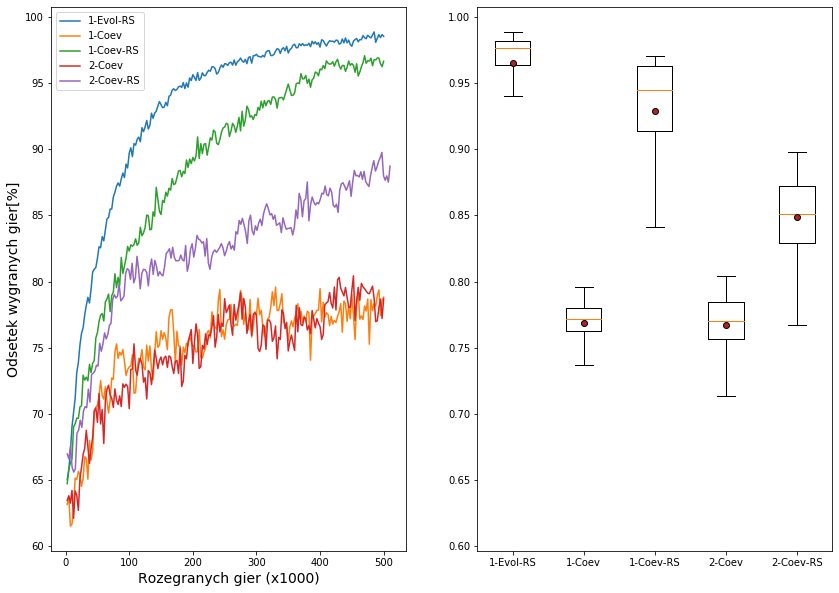

In [140]:
are = plt.figure(figsize=(14,10))
p1 = are.add_subplot(121)
plt.xlabel("Rozegranych gier (x1000)", fontsize=14)
plt.ylabel("Odsetek wygranych gier[%]", fontsize=14)
for file, label in zip(files, labels):
    draw_plot(file, label)
p2 = are.add_subplot(122)
draw_plot2()